<a href="https://colab.research.google.com/github/nestorpalacios/MVP2/blob/main/MVP2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pós Graduação Ciência de Dados - PUC Rio - Julho 2023**
## MVP Sprint 2 - Machine Learning & Analytics
##*Machine Learning para previsão de BHP (pressão do fundo do poço)*

###Eng. Nestor A. A. Palacios Chun


## **1. INTRODUÇÃO**

>Portuguese

Os campos de petróleo e gás geram a energia que movimenta o mundo, ao redor do planeta existem muitos campos produzindo por muitos anos. Uma das principais variáveis para entender o comportamento produtivo é a pressão do fundo do poço, que pode ser medida periodicamente por meio de ferramentas.

No entanto, para medir a pressão de fundo de um poço, ele precisa ser condicionado mecanicamente com um sensor de fundo de poço e o poço deve permanecer fechado para que a pressão medida seja representativa e atinja o fluxo radial para estimar as propriedades do reservatório.

Fechar o poço por um longo período de tempo tem implicações econômicas para as empresas operadoras, razão pela qual costuma-se fazer intervalos de tempo curtos ou em alguns casos onde é técnica e economicamente viável, são deixados sensores permanentes de pressão de fundo de poço para monitoramento.

O Dataset que vai funcionar representa o histórico de produção, pressão e características dos poços do campo off-shore de Volve (Equinor) localizado no Mar do Norte. Onde existe uma plataforma com sete poços.

Na imagem a seguir você pode ver a plataforma de onde saem os 7 poços e como eles se cruzam com o reservatório de Hugin.

>Español

Los campos de petroleo y gas generan energia que mueve el mundo, alrededor de planeta existen muchos campos produciendo desde muchos años atras. Una de las principales variables para entender el comportamiento productivo es la presion de fondo del pozo, la cual puede ser medida mediante herramientas periodicamente.

Sin embargo, para medir la presion de fondo de un pozo, este necesita ser acondicionado mecanicamente con un sensor de fondo y el pozo tiene que permanecer cerrado para que la presion medida sea representativa y esta alcance el flujo radial para estimar las propiedades del yacimiento.

Cerrar el pozo por un periodo grande de tiempo tiene implicaciones economicas en las empresas operadoras por lo cual se acostumbra a tomar intervalos pequeños de tiempo o en algunos casos en donde es viable tecnica y economicamente se dejan sensores de presion de fondo permanentes para el monitoreo.

El Dataset que se va a trabajar representa la historia de produccion, presion y caracteristicas de los pozos del campo off-shore de Volve (Equinor) ubicado en el Mar del Norte. En donde se cuenta con una plataforma con siete pozos.

En la imagen siguiente se puede ver la plataforma en donde salen los 7 pozos y como intersectan al reservorio Hugin.

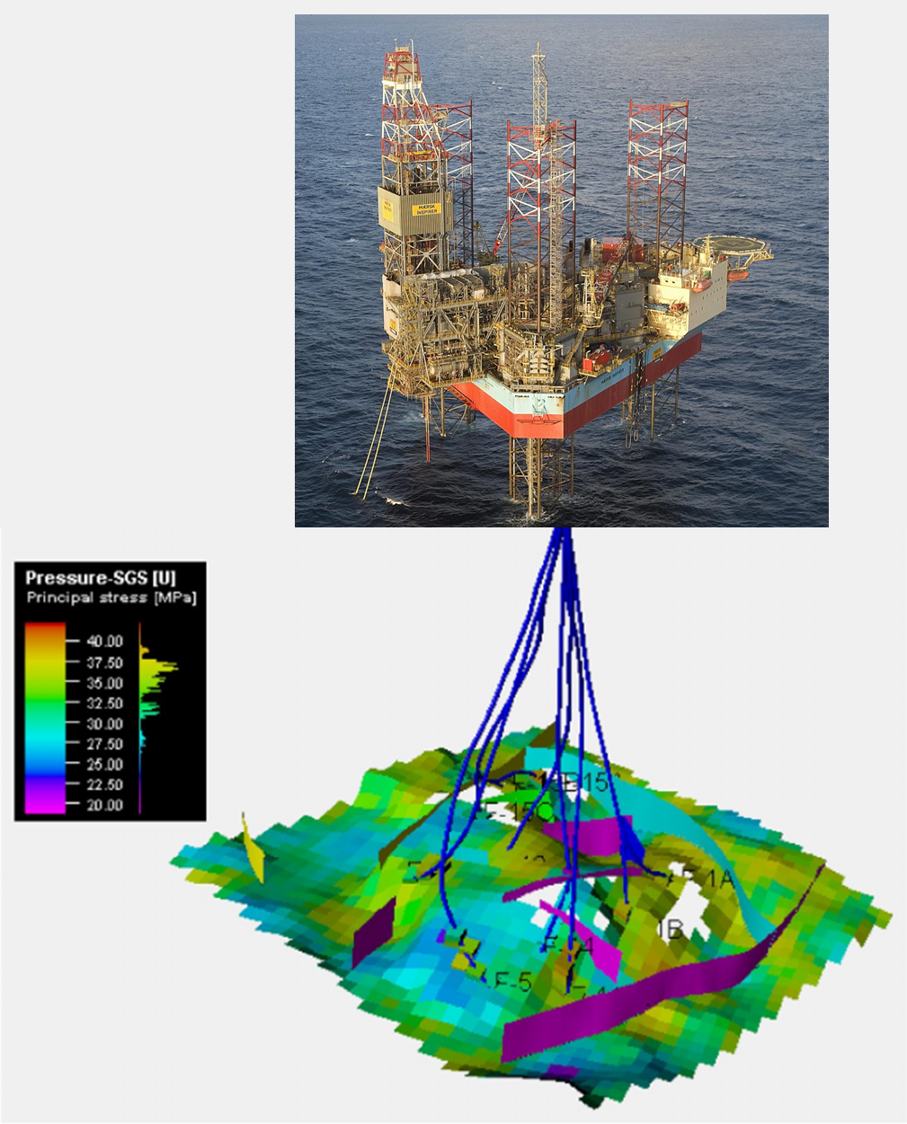

## **2. DEFINIÇÃO DO PROBLEMA**

### **2.1 Qual é a descrição do problema?**

* Compreender o comportamento da pressão dos formações produtivas de petróleo no campo a ser analisado.

### **2.2 Que premissas ou hipóteses você tem sobre o problema?**

* Com técnicas de machine learning podemos tentar prever o comportamento futuro do esgotamento do campo monitorando a variável de pressão de fundo dos poços.

### **2.3 Que restrições ou condições foram impostas para selecionar os dados?**

* Este conjunto de dados a importar é baseado em 1 arquivo Excel com informações de produção e características dos poços existentes. Serão consideradas apenas as informações dos poços, mas não será considerada a continuidade geológica das áreas produtoras para verificar a interligação dos poços existentes.

### **2.4 Defina cada um dos atributos do dataset.**

* O Dataset é um arquivo de excel, que possui diversas columnas. Para a análise foram utilizadas e importadas para o Github, que são:

*   **Volve_prd.xlsx :** Contém histórico de produção e estado do poço
  * DATEPRD				: data de produção
  * WELL_BORE_CODE			: nome completo do poço
  * NPD_WELL_BORE_CODE		: código de poço
  * NPD_WELL_BORE_NAME		: nome de poço curto
  * NPD_FIELD_CODE			: código do campo
  * NPD_FIELD_NAME			: nome do campo
  * NPD_FACILITY_CODE			: código da instalação de superfície
  * NPD_FACILITY_NAME			: nome da instalação de superfície
  * ON_STREAM_HRS			: On Stream hours
  * AVG_DOWNHOLE_PRESSURE		: pressão do fundo do poço
  * AVG_DOWNHOLE_TEMPERATURE	: temperatura do fundo do poço
  * AVG_DP_TUBING			: DP do tubing do poço
  * AVG_ANNULUS_PRESS			: pressão do casing do poço
  * AVG_CHOKE_SIZE_P			: tamanho do estrangulador (choke)
  * AVG_CHOKE_UOM			: unidade do estrangulador (choke)
  * AVG_WHP_P				: pressão da boca do poço
  * AVG_WHT_P				: temperatura da boca do poço
  * DP_CHOKE_SIZE			: porcentagem do tamanho do estrangulador (choke)
  * BORE_OIL_VOL				: volume de petroleo produzido
  * BORE_GAS_VOL			: volume de gás produzido
  * BORE_WAT_VOL			: volume de água produzido
  * BORE_WI_VOL				: volume de água injetado
  * FLOW_KIND				: estado do poço
  * WELL_TYPE				: tipo de poço


##**3. PREPARAÇAO DE DADOS**

### *3.1 Carregamento de bibliotecas usadas*

In [344]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns
from ipywidgets import interact
import missingno as ms
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### *3.2 Carga do Dataset*

In [300]:
# carga do dataset através de um arquivo
file_1 = "https://raw.githubusercontent.com/nestorpalacios/MVP2/main/Volve_prd.xlsx" # arquivo fica no Github
df_prod = pd.read_excel(file_1)

# verifica o tipo de df_prod
print(type(df_prod))

df_prod.head()

<class 'pandas.core.frame.DataFrame'>


,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [301]:
# Mostra as dimensões do dataset
print(df_prod.shape)

(15634, 24)


In [302]:
# as informações da tabela são exibidas
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

In [303]:
# Apenas os poços produtores precisam ser analisados, pois a pressão dos poços injetores é definida na superfície do poço. Para isso vamos usar apenas "OP" dentro do Well_type
df_prod['WELL_TYPE']

0        WI
1        OP
2        OP
3        OP
4        OP
         ..
15629    OP
15630    OP
15631    OP
15632    OP
15633    WI
Name: WELL_TYPE, Length: 15634, dtype: object

In [304]:
df_prod = df_prod[df_prod['WELL_TYPE']=='OP']
df_prod.shape

(9143, 24)

### *3.3 Limpeza e separação de dados*

In [305]:
#Vamos renomear as colunas para que sejam mais semelhantes às variáveis ​​comumente usadas na indústria de petróleo e gás.
column_names = {
    'DATEPRD': 'Date',
    'WELL_BORE_CODE': 'Well_ID',
    'NPD_WELL_BORE_CODE': 'well_name_code',
    'NPD_WELL_BORE_NAME': 'well_name',
    'NPD_FIELD_CODE': 'field_code',
    'NPD_FIELD_NAME': 'field_name',
    'NPD_FACILITY_CODE': 'facility_code',
    'NPD_FACILITY_NAME': 'facility_name',
    'ON_STREAM_HRS': 'on_stream_hours',
    'AVG_DOWNHOLE_PRESSURE': 'BHP',
    'AVG_DOWNHOLE_TEMPERATURE': 'BHT',
    'AVG_DP_TUBING': 'DP_tubing',
    'AVG_ANNULUS_PRESS': 'casing_pressure',
    'AVG_CHOKE_SIZE_P': 'choke_size',
    'AVG_CHOKE_UOM': 'choke_units',
    'AVG_WHP_P': 'WHP',
    'AVG_WHT_P': 'WHT',
    'DP_CHOKE_SIZE': 'choke_size_%',
    'BORE_OIL_VOL': 'Oil_vol',
    'BORE_GAS_VOL': 'Gas_vol',
    'BORE_WAT_VOL': 'Water_vol',
    'BORE_WI_VOL': 'Water_inj',
    'FLOW_KIND': 'Well_status',
    'WELL_TYPE': 'Well_type'
}

In [306]:
df_prod.rename(columns=column_names, inplace=True)
df_prod.head()

,Date,Well_ID,well_name_code,well_name,field_code,field_name,facility_code,facility_name,on_stream_hours,BHP,...,choke_units,WHP,WHT,choke_size_%,Oil_vol,Gas_vol,Water_vol,Water_inj,Well_status,Well_type
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
5,2014-04-12,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,303.50078,...,%,22.05334,8.70429,22.05334,0.0,0.0,0.0,NaN,production,OP


In [307]:
# vamos eliminar as variáveis ​​que não vamos usar na análise
drop_var = ['Well_ID', 'on_stream_hours', 'casing_pressure', 'well_name_code',
                   'field_code', 'field_name', 'facility_code', 'facility_name', 'choke_units',
                   'choke_size', 'Well_status', 'Well_type', 'Water_inj']
df = df_prod.drop(drop_var, axis=1)
df.head()

,Date,well_name,BHP,BHT,DP_tubing,WHP,WHT,choke_size_%,Oil_vol,Gas_vol,Water_vol
1,2014-04-08,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
2,2014-04-09,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
3,2014-04-10,15/9-F-1 C,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.0,0.0,0.0
4,2014-04-11,15/9-F-1 C,310.37614,96.87589,277.27826,33.09788,10.47992,33.07195,0.0,0.0,0.0
5,2014-04-12,15/9-F-1 C,303.50078,96.92339,281.44744,22.05334,8.70429,22.05334,0.0,0.0,0.0


In [308]:
# as informações da tabela são exibidas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9143 entries, 1 to 15632
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          9143 non-null   datetime64[ns]
 1   well_name     9143 non-null   object        
 2   BHP           8978 non-null   float64       
 3   BHT           8978 non-null   float64       
 4   DP_tubing     8978 non-null   float64       
 5   WHP           9137 non-null   float64       
 6   WHT           9129 non-null   float64       
 7   choke_size_%  9137 non-null   float64       
 8   Oil_vol       9143 non-null   float64       
 9   Gas_vol       9143 non-null   float64       
 10  Water_vol     9143 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 857.2+ KB


In [309]:
df.isnull().sum()

Date              0
well_name         0
BHP             165
BHT             165
DP_tubing       165
WHP               6
WHT              14
choke_size_%      6
Oil_vol           0
Gas_vol           0
Water_vol         0
dtype: int64

<Axes: >

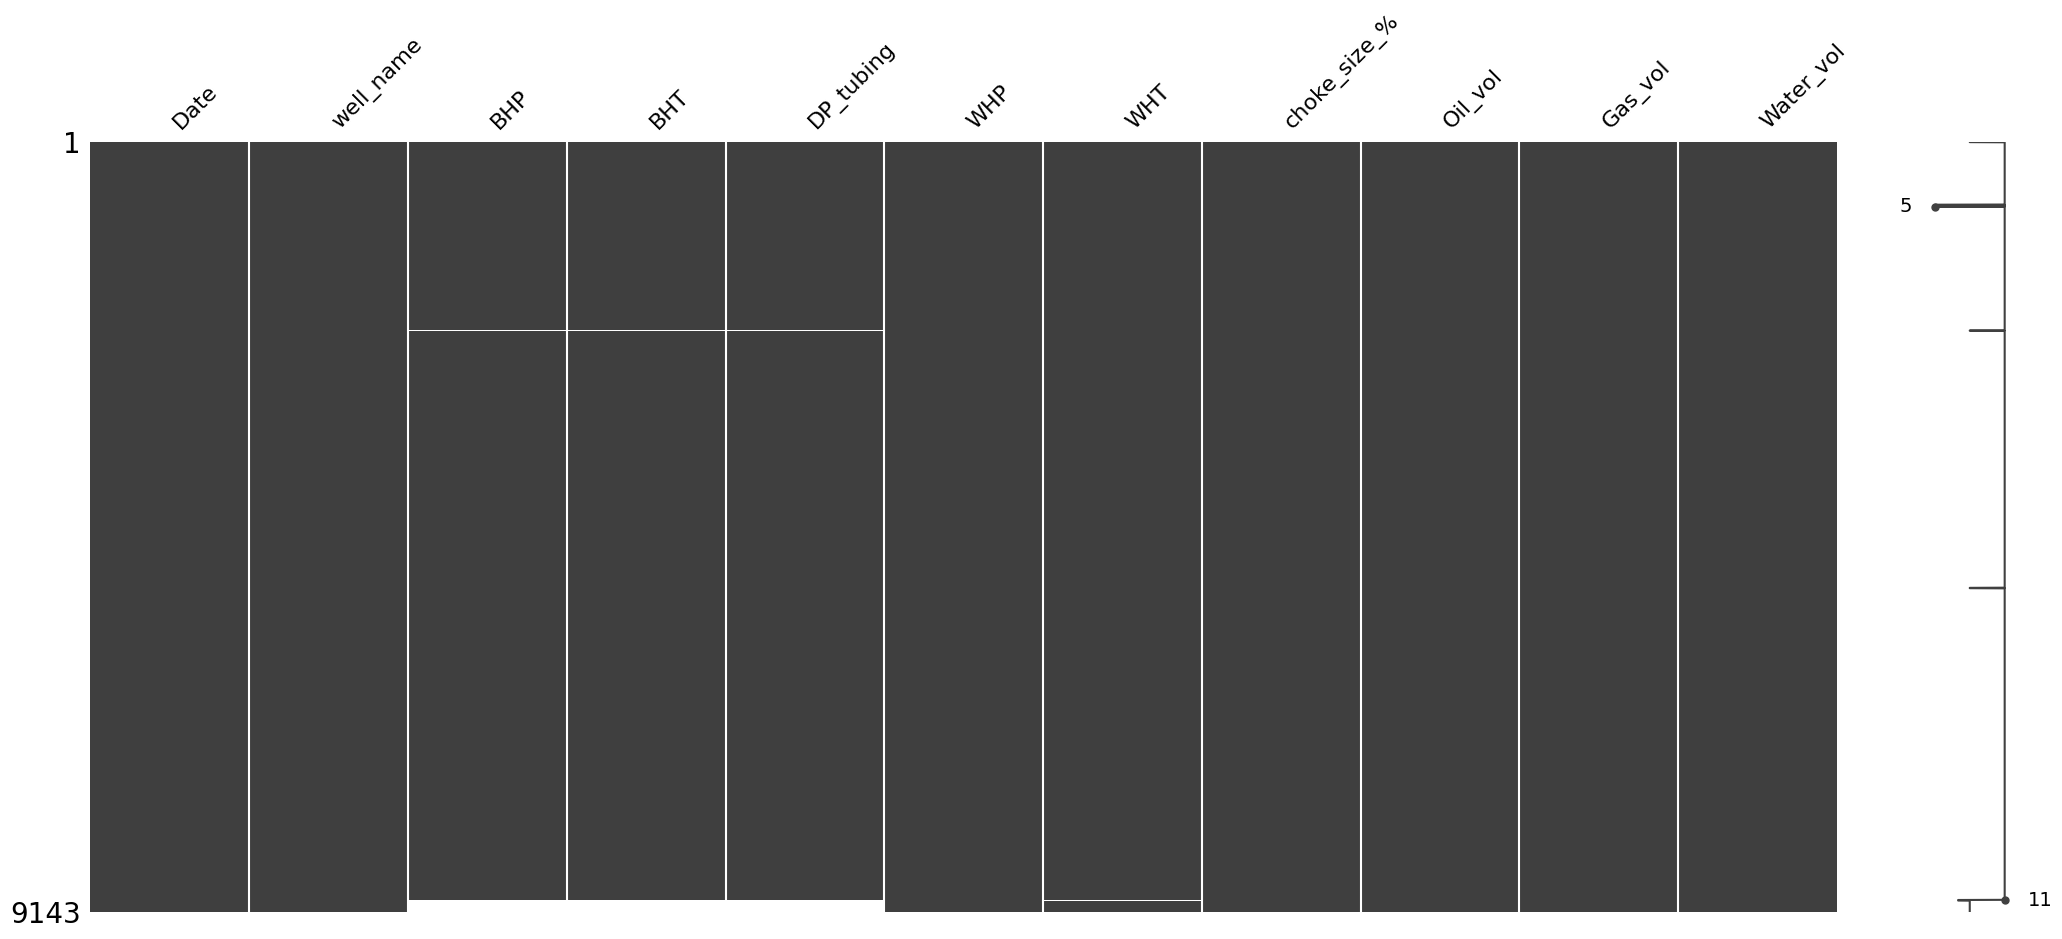

In [310]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(df.columns)

# o novo dataset irá conter todas as colunas do dataset original
prodwellSemMissings = df[col[:]]

# exibindo visualização matricial da nulidade do dataset
ms.matrix(prodwellSemMissings)

In [311]:
prodwellSemMissings.dropna(inplace=True)
prodwellSemMissings.isnull().sum()

Date            0
well_name       0
BHP             0
BHT             0
DP_tubing       0
WHP             0
WHT             0
choke_size_%    0
Oil_vol         0
Gas_vol         0
Water_vol       0
dtype: int64

In [312]:
prodwellSemMissings.shape

(8978, 11)

<Axes: >

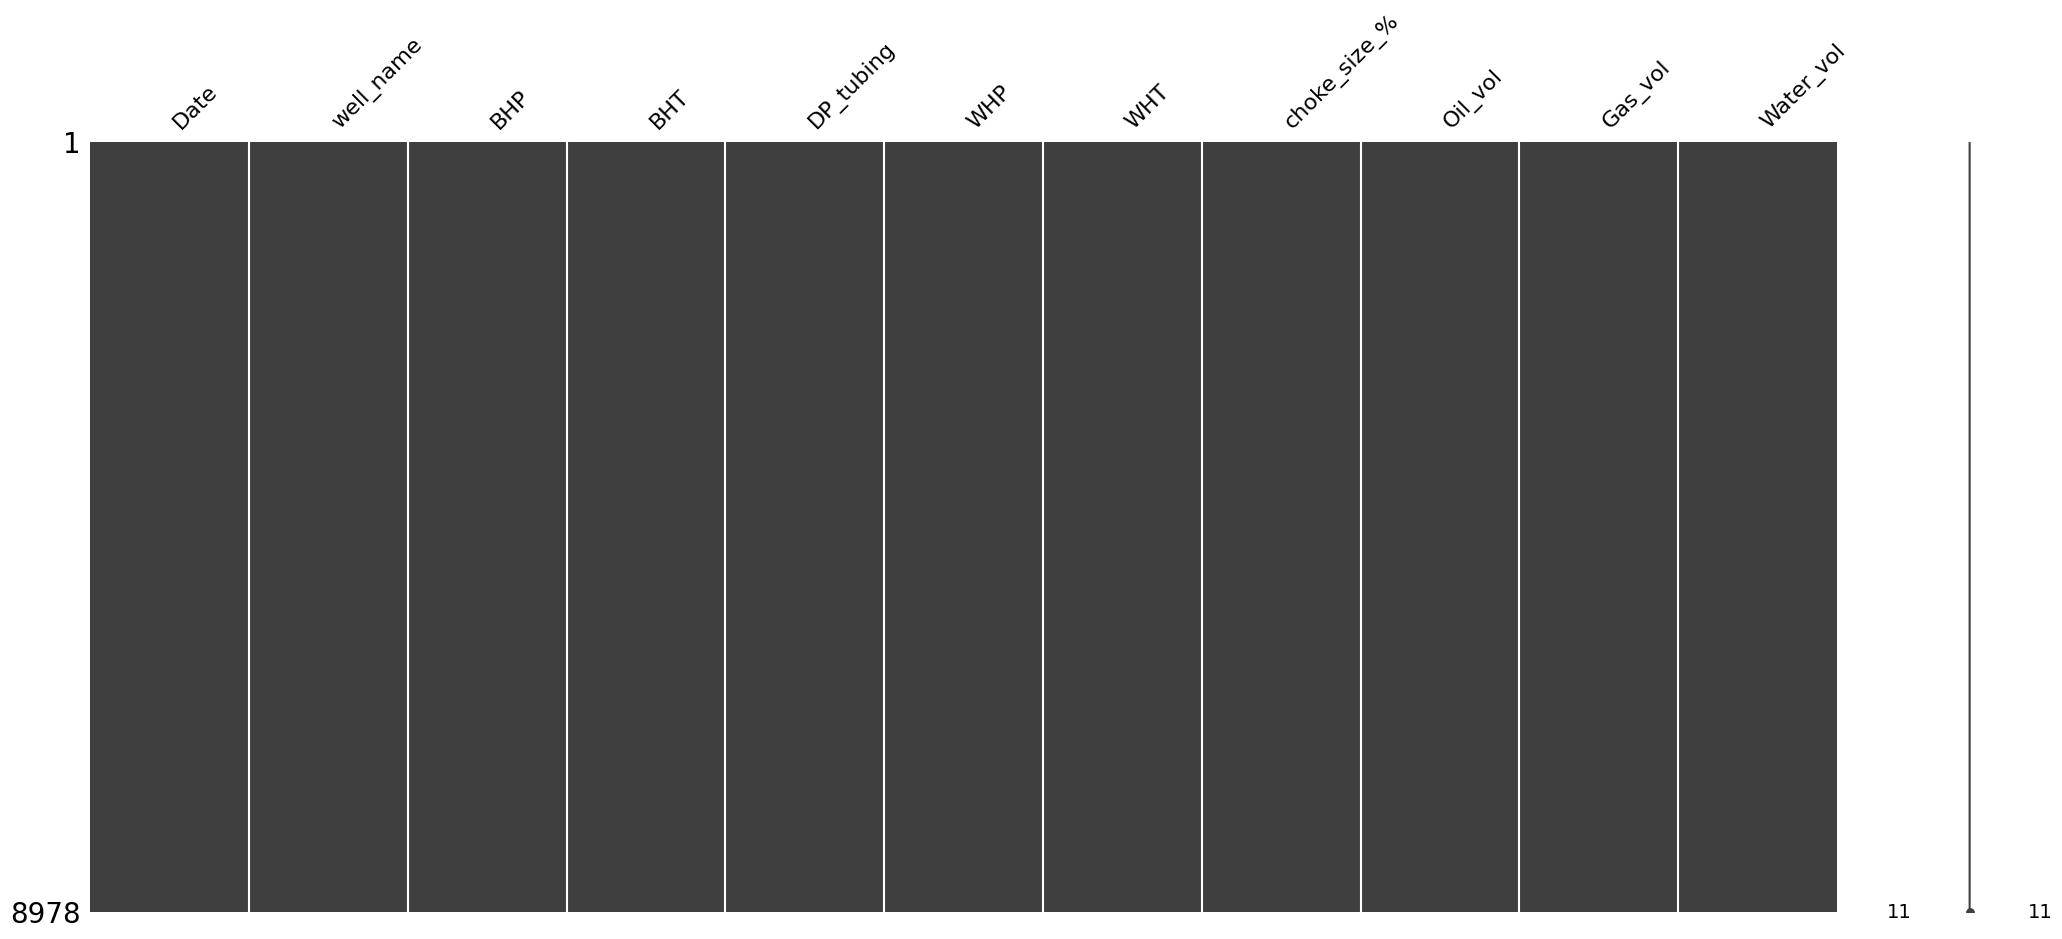

In [313]:
ms.matrix(prodwellSemMissings)

In [314]:
prodwellSemMissings.describe()

,BHP,BHT,DP_tubing,WHP,WHT,choke_size_%,Oil_vol,Gas_vol,Water_vol
count,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000,8978.000000
mean,181.820413,77.168114,154.045010,45.774803,68.160861,19.454990,1107.055257,162684.259871,1704.698507
std,109.707241,45.654600,76.743653,24.686681,27.665425,22.613863,1325.247814,188338.136972,1708.823188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000
25%,0.000000,0.000000,84.163947,31.420656,58.966528,3.480090,190.447500,29391.745000,20.875000
50%,232.927076,103.186689,175.603884,38.303616,80.303883,9.881511,573.205000,89586.655000,1160.085000
75%,255.405756,106.276408,204.335726,57.598695,88.118935,27.292412,1374.610000,207549.382500,3288.062500
max,397.588550,108.502178,345.906770,137.311030,93.509584,125.718570,5888.690000,835981.330000,8019.740000


In [315]:
prodwellSemMissings.shape

(8978, 11)

In [316]:
#Podem ser observados valores negativos de produção de água, vamos retirar esses valores
df1=prodwellSemMissings[prodwellSemMissings['Water_vol']>=0]

In [383]:
df1.describe()

,BHP,BHT,DP_tubing,WHP,WHT,choke_size_%,Oil_vol,Gas_vol,Water_vol
count,8974.000000,8974.000000,8974.000000,8974.000000,8974.000000,8974.000000,8974.000000,8974.000000,8974.000000
mean,181.814122,77.167618,154.047404,45.762784,68.154930,19.444991,1106.667255,162639.313356,1705.517648
std,109.705213,45.654786,76.750721,24.680193,27.669907,22.608778,1324.948515,188285.185702,1708.758706
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,84.163947,31.419984,58.960620,3.478237,190.410000,29395.372500,21.377500
50%,232.896939,103.186689,175.614854,38.293079,80.303883,9.867209,572.380000,89586.655000,1160.630000
75%,255.398129,106.276613,204.335726,57.579888,88.118935,27.278196,1373.490000,207536.267500,3288.545000
max,397.588550,108.502178,345.906770,137.311030,93.509584,125.718570,5888.690000,835981.330000,8019.740000


In [384]:
df1.shape

(8974, 11)

In [387]:
#Vamos analisar o comportamento do BHP dos poços quando estão produzindo.
df2=df1[df1['Oil_vol']>0]

In [388]:
df3=df2[df2['WHP']>0]

In [389]:
df4=df3[df3['BHP']>0]

In [390]:
df4.describe()

,BHP,BHT,DP_tubing,WHP,WHT,choke_size_%,Oil_vol,Gas_vol,Water_vol
count,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000
mean,240.322314,104.506273,191.892796,48.441916,73.538917,19.234698,1475.579722,215397.871877,1541.655281
std,22.984804,4.101105,26.513671,20.167265,18.690797,18.475787,1463.399523,206970.856871,1480.744101
min,1.926270,0.352200,7.219360,0.000067,7.036688,0.194397,0.170000,28.860000,0.000000
25%,221.342071,102.774991,169.735381,32.119707,66.615005,3.482690,287.530000,44946.010000,99.305000
50%,243.108703,105.901870,187.615194,41.400000,80.498811,12.525910,1026.750000,156697.430000,887.500000
75%,258.104445,106.502750,212.107049,61.214742,87.345561,29.138153,2138.830000,319280.335000,3045.325000
max,308.055940,108.502178,257.434314,120.888576,93.509584,106.035140,5888.690000,835981.330000,8019.740000


In [391]:
#Agora excluímos as variáveis ​​que não precisamos mais
df_prd = df4.drop(['Gas_vol', 'Water_vol','BHT'], axis=1)

In [392]:
df_prd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5935 entries, 15 to 8927
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5935 non-null   datetime64[ns]
 1   well_name     5935 non-null   object        
 2   BHP           5935 non-null   float64       
 3   DP_tubing     5935 non-null   float64       
 4   WHP           5935 non-null   float64       
 5   WHT           5935 non-null   float64       
 6   choke_size_%  5935 non-null   float64       
 7   Oil_vol       5935 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 417.3+ KB


In [393]:
df_prd.isnull().sum()

Date            0
well_name       0
BHP             0
DP_tubing       0
WHP             0
WHT             0
choke_size_%    0
Oil_vol         0
dtype: int64

In [394]:
df_prd.describe()

,BHP,DP_tubing,WHP,WHT,choke_size_%,Oil_vol
count,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000
mean,240.322314,191.892796,48.441916,73.538917,19.234698,1475.579722
std,22.984804,26.513671,20.167265,18.690797,18.475787,1463.399523
min,1.926270,7.219360,0.000067,7.036688,0.194397,0.170000
25%,221.342071,169.735381,32.119707,66.615005,3.482690,287.530000
50%,243.108703,187.615194,41.400000,80.498811,12.525910,1026.750000
75%,258.104445,212.107049,61.214742,87.345561,29.138153,2138.830000
max,308.055940,257.434314,120.888576,93.509584,106.035140,5888.690000


<Axes: >

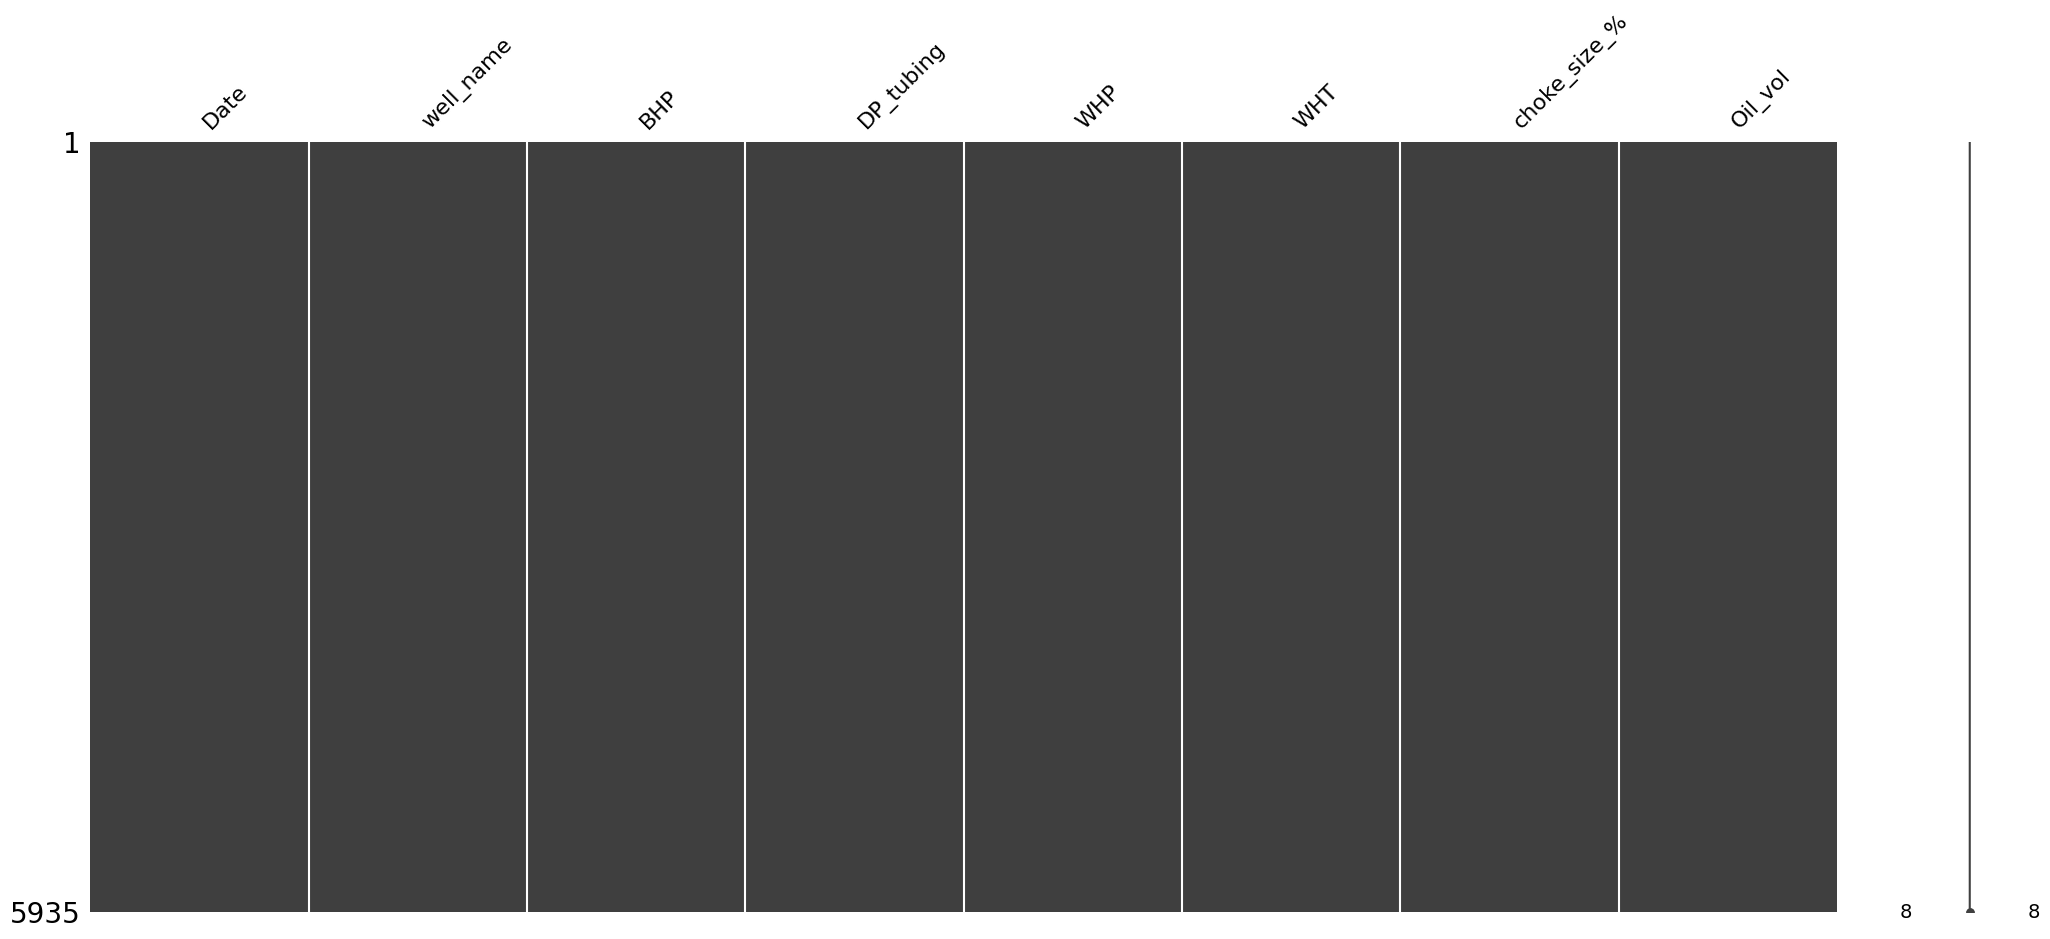

In [398]:
ms.matrix(df_prd)

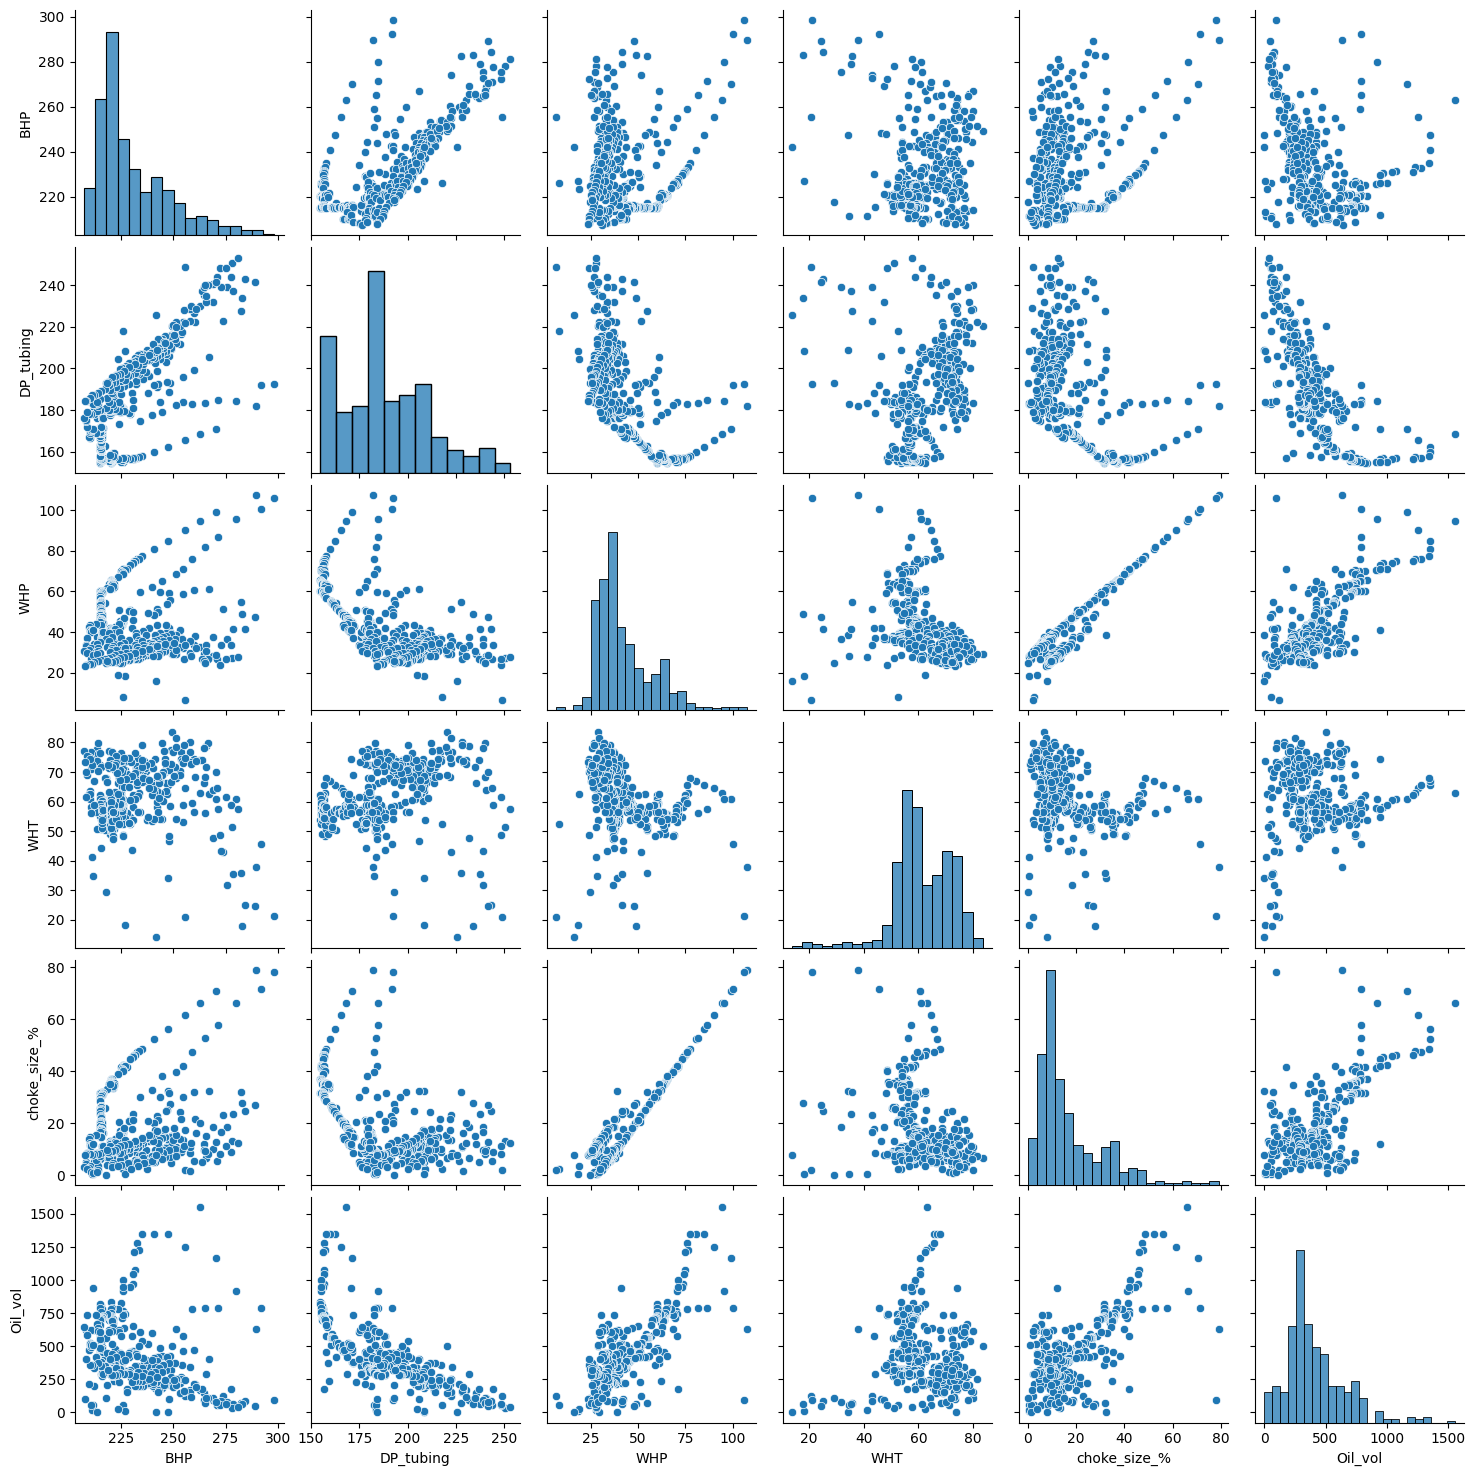

In [399]:
wellnames = df_prd['well_name'].unique()
sns.pairplot(df_prd[df_prd['well_name']==wellnames[0]])

##**4. MODELAGEM E TREINAMENTO**

### 4.1 Executando uma classificação

In [400]:
data_prd=df_prd

In [401]:
data_prd.head()

,Date,well_name,BHP,DP_tubing,WHP,WHT,choke_size_%,Oil_vol
15,2014-04-22,15/9-F-1 C,289.421362,182.059312,107.362050,37.939251,78.935409,631.47
16,2014-04-23,15/9-F-1 C,270.239793,171.052782,99.187011,60.756579,70.627109,1166.46
17,2014-04-24,15/9-F-1 C,262.842747,168.241977,94.600770,63.046800,66.049151,1549.81
18,2014-04-25,15/9-F-1 C,255.526995,165.538903,89.988092,64.547229,61.405386,1248.70
19,2014-04-26,15/9-F-1 C,247.199052,162.422242,84.776810,65.723694,56.147906,1345.78


In [403]:
array = data_prd.values
X = array[:,3:8] # atributos
y = array[:,2:3] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [405]:
print(X)


[[182.059311875 107.36204979166666 37.93925125 78.93540895833333 631.47]
 [171.05278208333334 99.18701083333333 60.756579375 70.627109375 1166.46]
 [168.24197729166667 94.60077020833333 63.046799791666665 66.049150625
  1549.81]
 ...
 [178.61514875 15.701963333333333 50.10341583333334 1.27963875 142.74]
 [179.59875104166667 15.608421666666667 49.841091875 1.2041275 144.46]
 [179.54775632653062 15.757951700680271 48.73424476190476
  1.3028083673469388 106.3]]


LR: MSE 0.68 (1.67) - RMSE 0.82
Ridge: MSE 0.68 (1.67) - RMSE 0.82
Lasso: MSE 0.68 (1.74) - RMSE 0.83
KNN: MSE 65.69 (29.37) - RMSE 8.11
CART: MSE 18.24 (24.42) - RMSE 4.27
SVM: MSE 536.61 (59.59) - RMSE 23.16


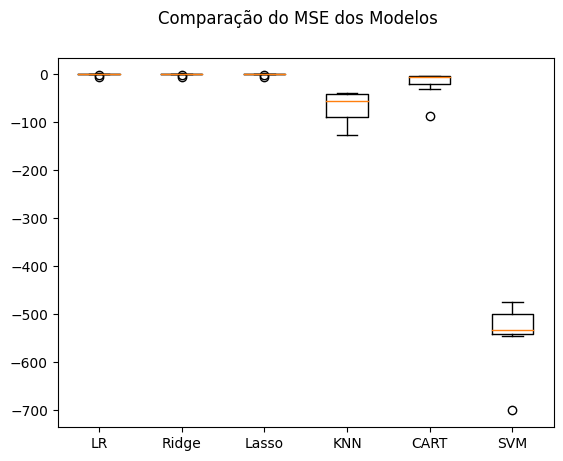

In [406]:
# Modelagem #1

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: MSE 0.68 (1.67) - RMSE 0.82
Ridge: MSE 0.68 (1.67) - RMSE 0.82
Lasso: MSE 0.68 (1.74) - RMSE 0.83
KNN: MSE 65.69 (29.37) - RMSE 8.11
CART: MSE 18.24 (24.42) - RMSE 4.27


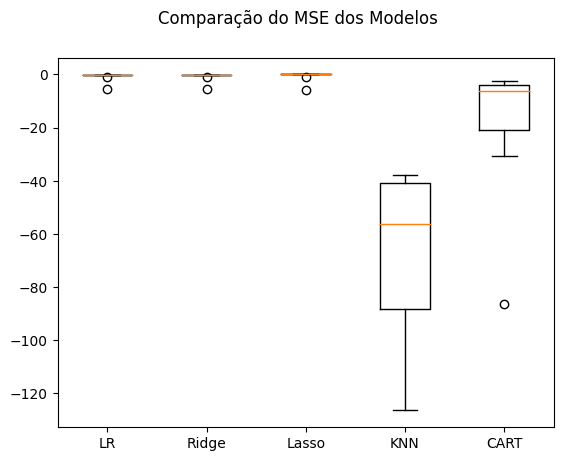

In [407]:
# Modelagem #2 - vamos remover o SVM

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))


# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: MSE 0.68 (1.67) - RMSE 0.82
Ridge: MSE 0.68 (1.67) - RMSE 0.82
Lasso: MSE 0.68 (1.74) - RMSE 0.83


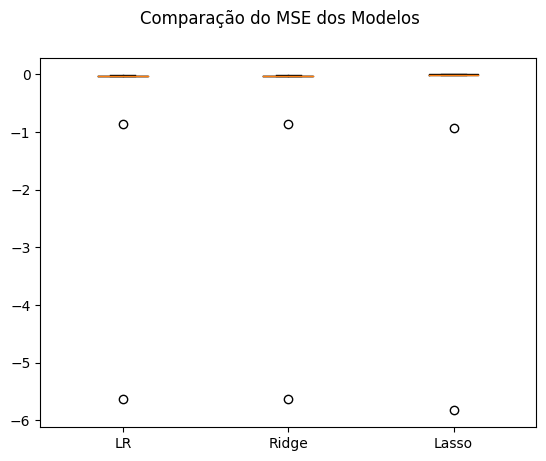

In [408]:
# Modelagem #3 - vamos remover o KNN e CART

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [412]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 0.03
RMSE 0.17


In [413]:
# Criando um modelo com todo o conjunto de treino
model = Ridge()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 0.03
RMSE 0.17


In [414]:
# Criando um modelo com todo o conjunto de treino
model = Lasso()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 0.01
RMSE 0.08


 - Lasso é a melhor opção.

### 4.2 Executando uma ANN - Rede Neuronal

In [415]:
predictors = ['DP_tubing','WHP','choke_size_%', 'Oil_vol']

In [416]:
X = data_prd[predictors]
y = data_prd['BHP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [417]:
model = Sequential()
model.add(Dense(32, input_shape = (len(predictors),), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))
sgd = optimizers.Adam(lr = 0.001)
model.compile(optimizer = sgd, loss = 'mse', metrics=['mae'])
model.fit(X_train, y_train.values, batch_size = 700, epochs = 500, verbose = 1)

Epoch 1/500
7/7 [==============================] - 1s 4ms/step - loss: 25340.8945 - mae: 143.7220
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 18059.0371 - mae: 125.1580
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 13460.2334 - mae: 105.8076
Epoch 4/500
7/7 [==============================] - 0s 3ms/step - loss: 9583.2344 - mae: 91.4638
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 6490.6343 - mae: 74.7494
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 4051.1174 - mae: 59.2872
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 2367.4336 - mae: 44.3827
Epoch 8/500
7/7 [==============================] - 0s 3ms/step - loss: 1298.1805 - mae: 30.7810
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 686.6040 - mae: 21.6925
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 418.6611 - mae: 18.1760
Epoch 11/500
7/7 [=================

In [418]:
df_prod['bhp_ANN'] = model.predict(df_prod[predictors])

286/286 [==============================] - 0s 1ms/step


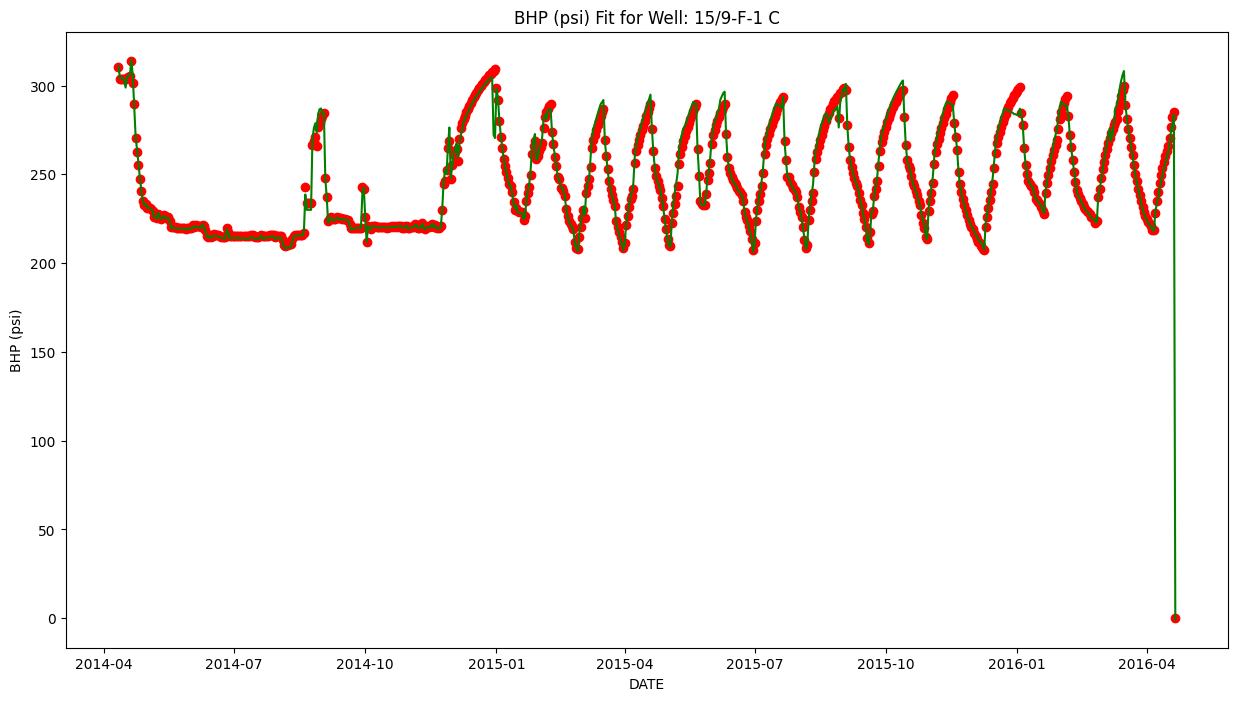

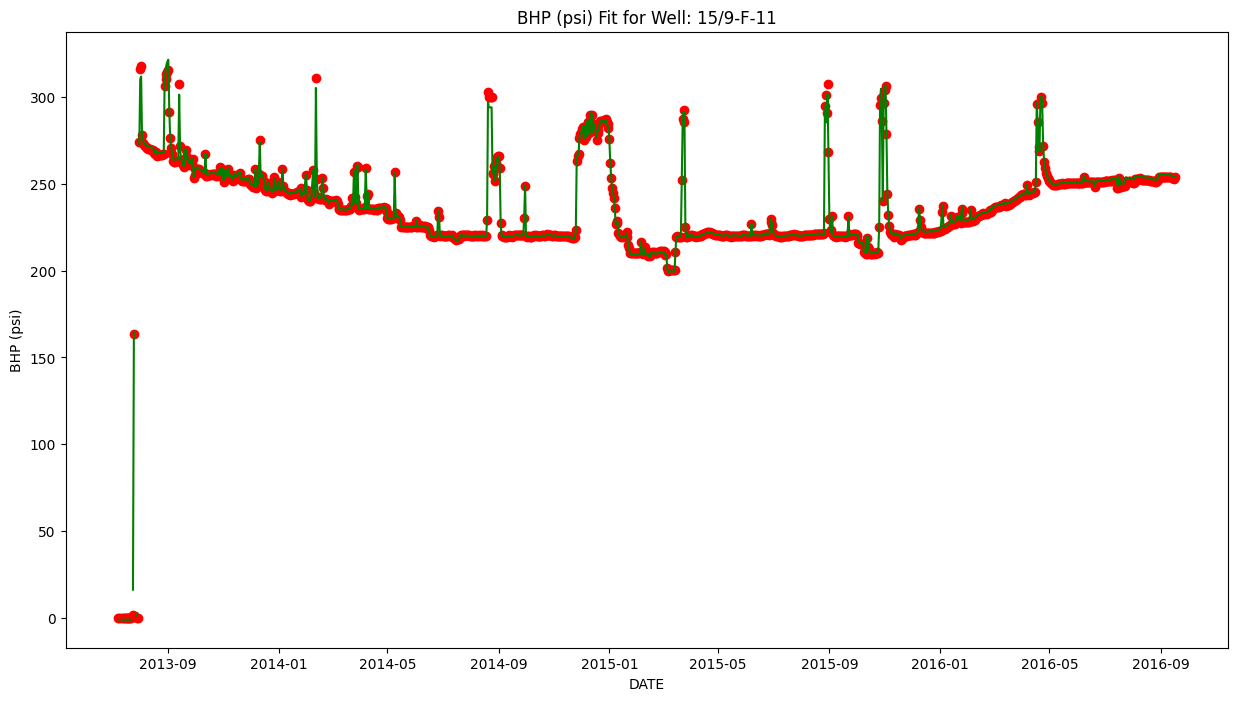

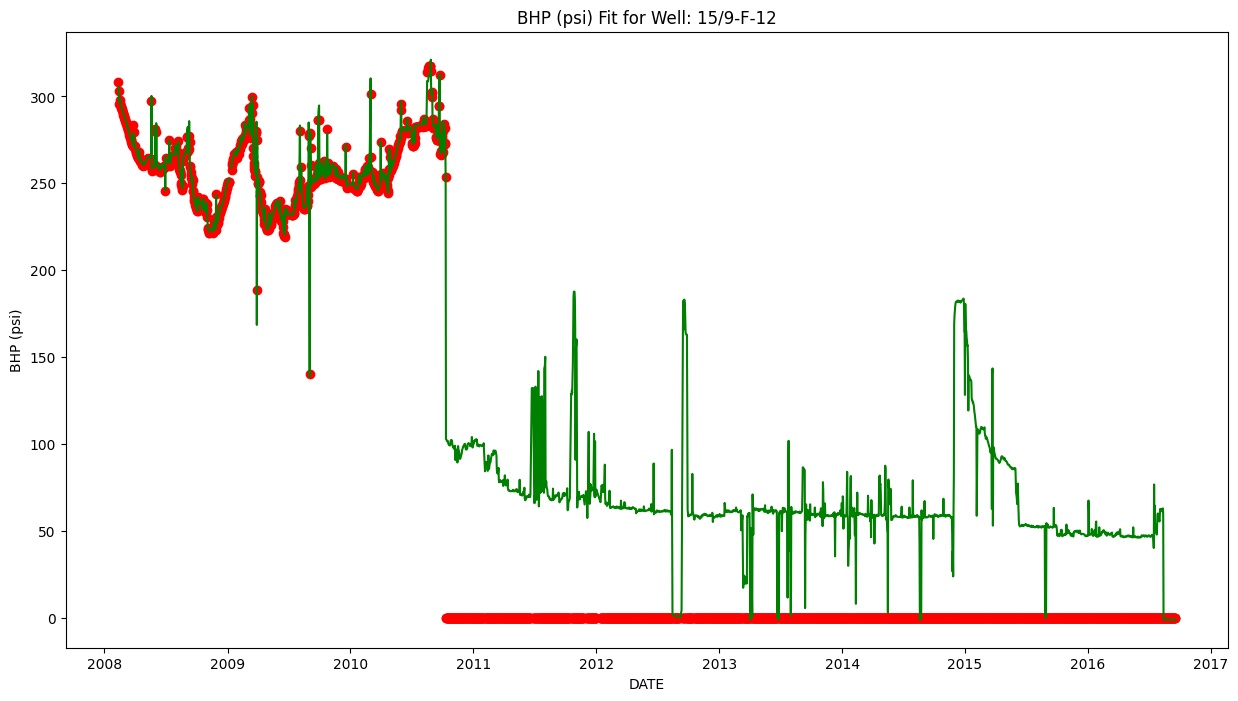

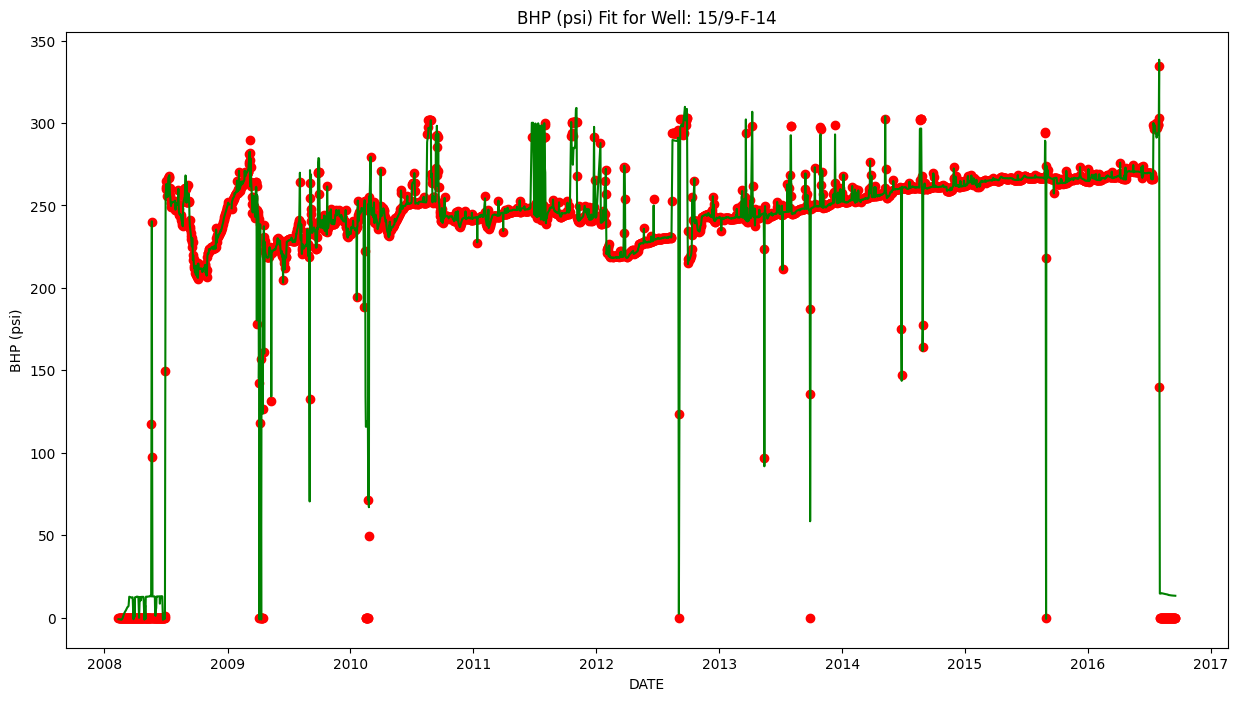

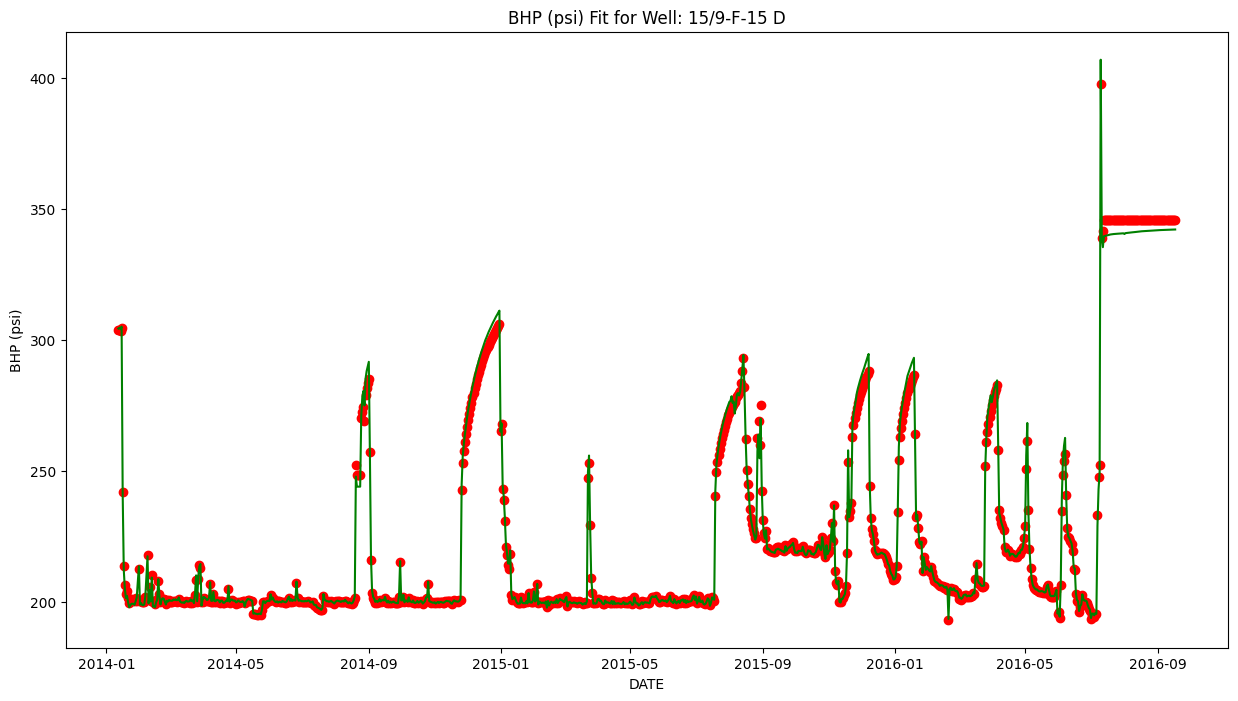

In [419]:
for well in wellnames:
    dfpred = df_prod[df_prod['well_name']==well]

    plt.figure(figsize=(15,8))
    plt.scatter(dfpred['Date'], dfpred['BHP'], color = 'red')
    plt.plot(dfpred['Date'], dfpred['bhp_ANN'], color='green')
    plt.title("BHP (psi) Fit for Well: " + str(well))
    plt.xlabel('DATE')
    plt.ylabel('BHP (psi)')
    plt.show();

##**5. AVALIAÇÃO DE RESULTADOS**

### 5.1 Observou-se que com um exercício de classificação, foi validada a hipótese de que um modelo de Machine Learning (Lasso) pode nos ajudar a ajustar o comportamento BHP dos poços.

### 5.2 Observou-se que com uma RNA foi possível ajustar um modelo para BHP, o que é muito útil para entender melhor o reservatório de óleo e seu esgotamento no tempo.